## Training YOLOv5 on the SKU110K dataset

In this notebook we use the SKU110K dataset, assumed to be available locally, to train YOLOv5 models.

### Step 1: Install Requirements

In [1]:
import os
import torch
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.0 (CPU)


### Step 2: Prepare the SKU110K Dataset

We need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

For the SKU110K dataset, the preparation and formating are handled in the notebook `datasets/dataset_SKU110K.ipynb`


### Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** our dataset location
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
%%bash

mkdir -p weights/yolov5
#export VERBOSE=False
python ./yolov5/train.py --img 416 --batch 16 --epochs 1 --data datasets/SKU110K_fixed/data.yaml --weights weights/yolov5/yolov5s.pt --cache

## Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir yolov5/runs

In [ ]:
# !python yolov5/detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source datasets/SKU110K_fixed/test/images
!python yolov5/detect.py --weights weights/yolov5/yolov5s.pt --img 416 --conf 0.1 --source datasets/SKU110K_fixed/images/test

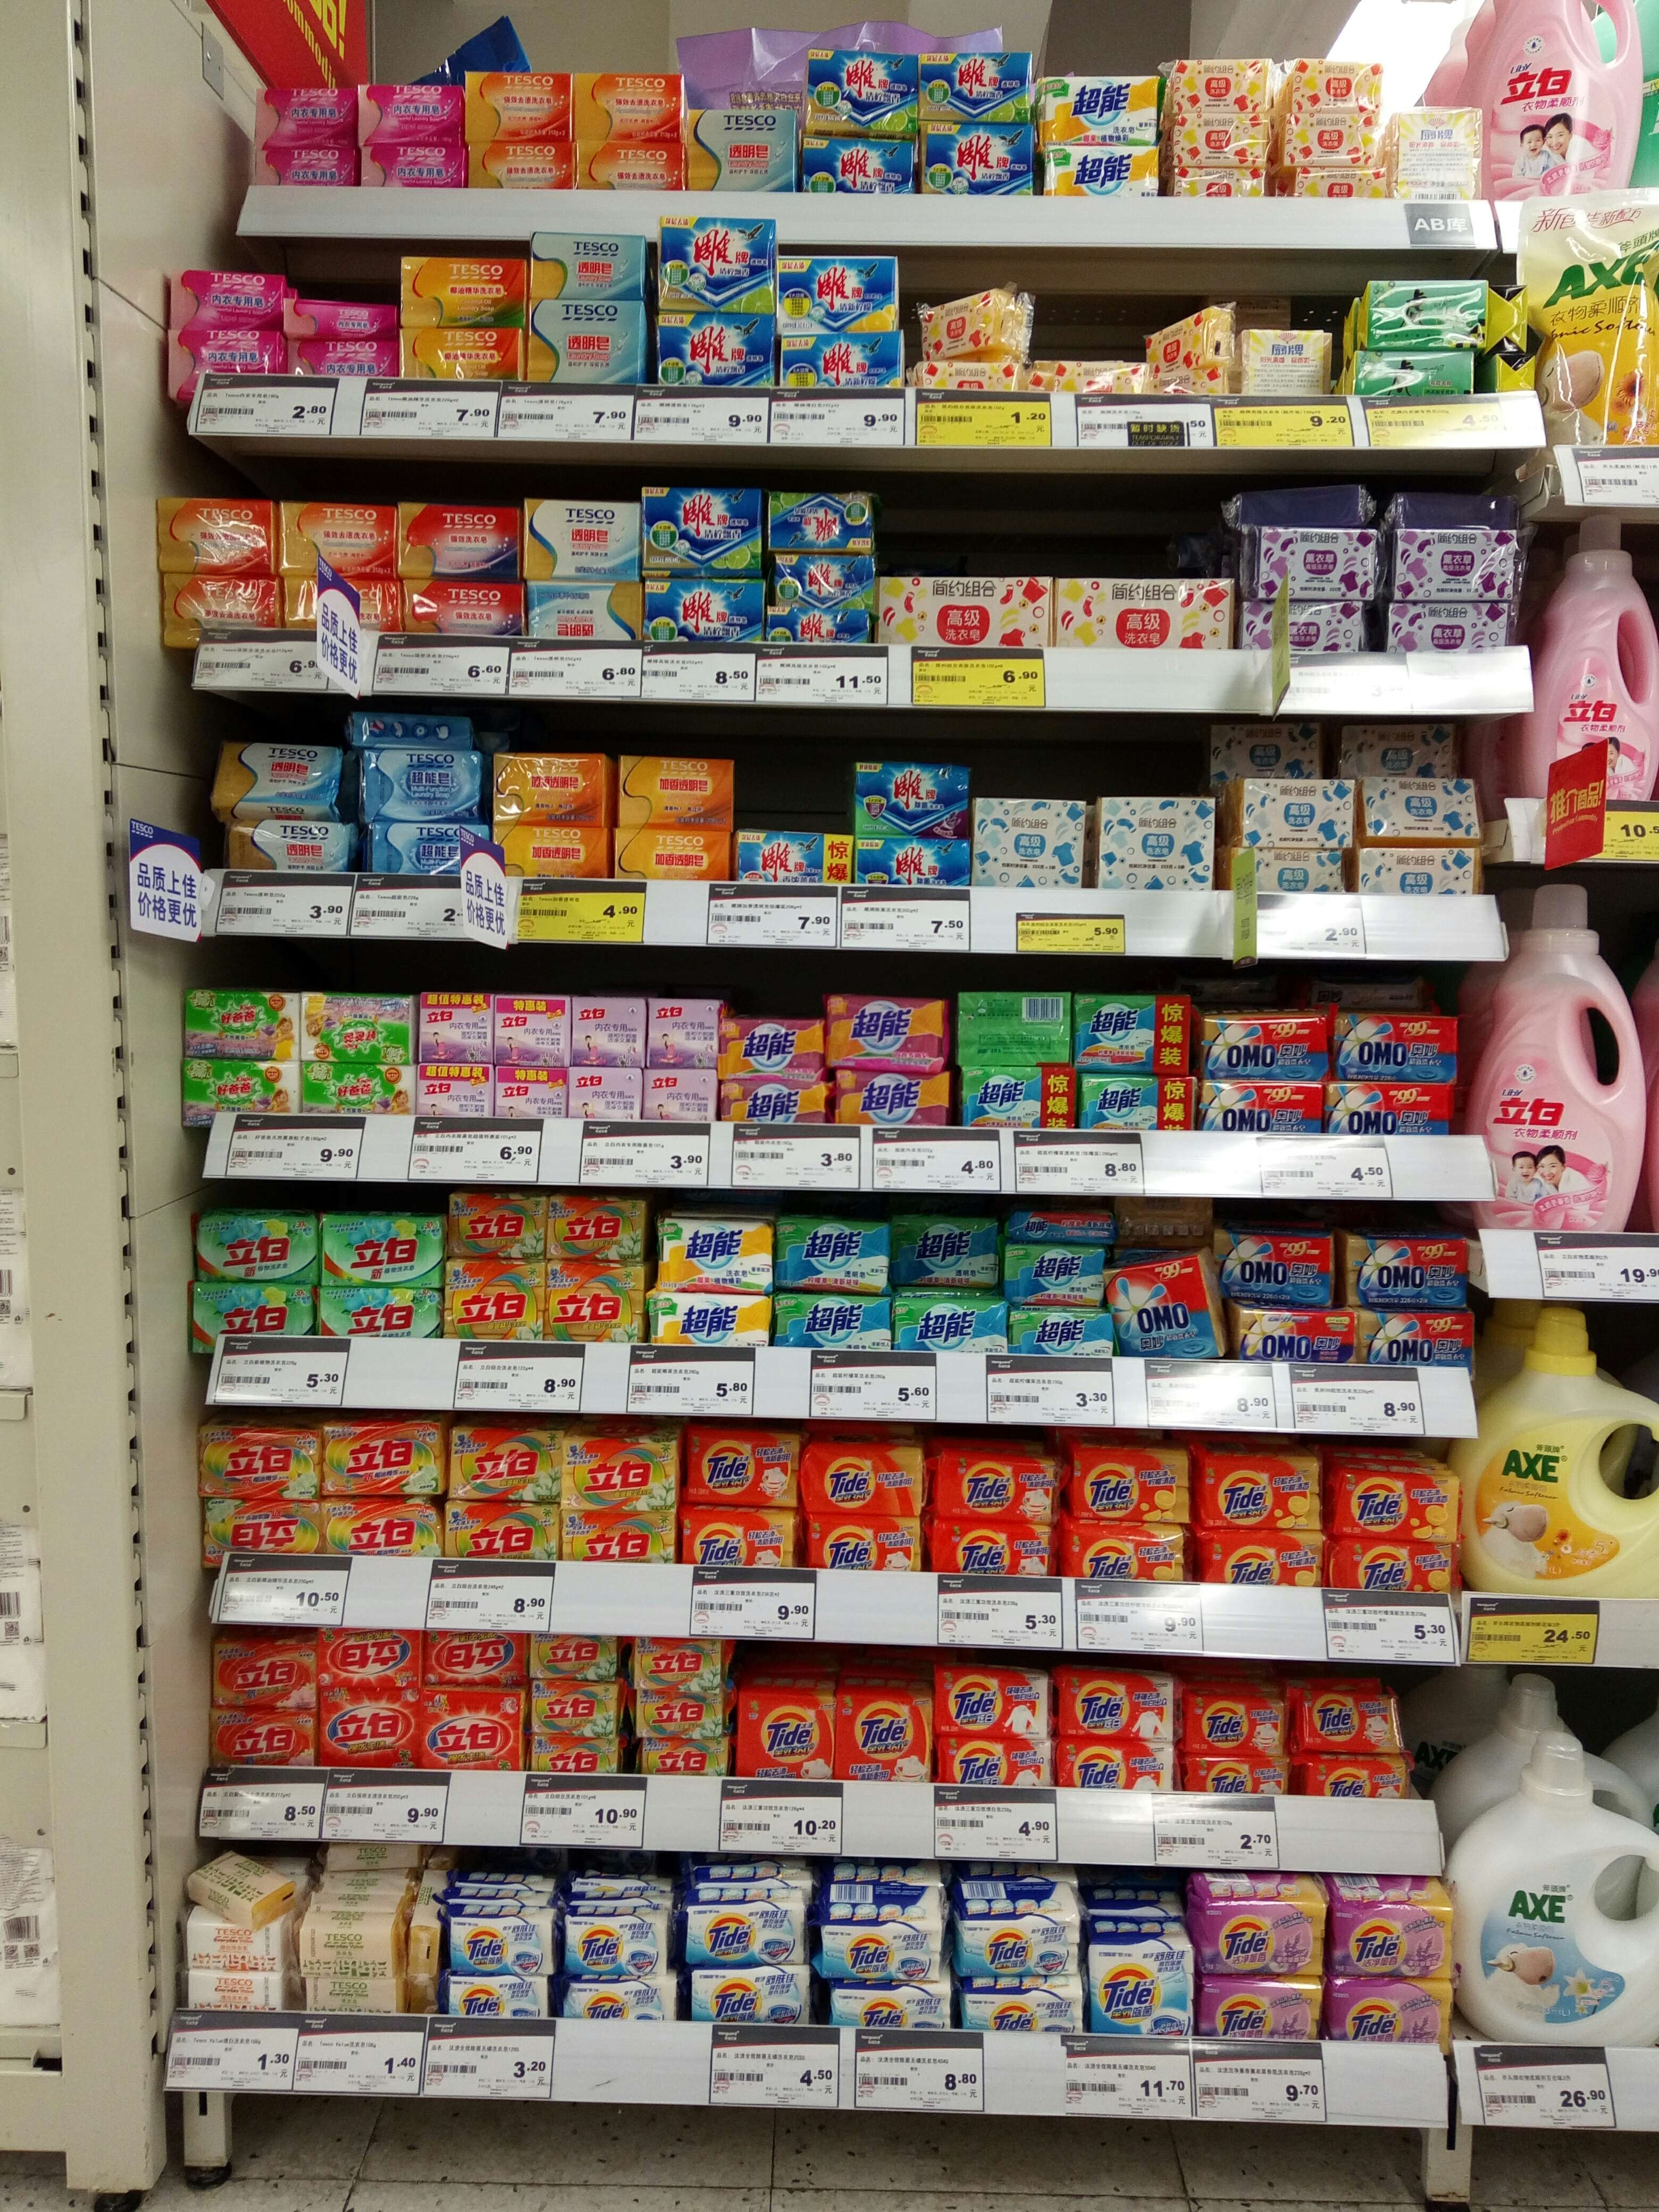

In [4]:
#display inference on the first test image

import glob
from IPython.display import Image, display

for imageName in glob.glob('yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    break

## Conclusion and Next Steps

We've officially trained a YOLOv5 model on a custom dataset to detect specific objects.

To improve the model's performance, it's recommended to first interate on dataset coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy a model to an application, see this guide on [exporting a model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once a model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).